### The first dataset is a set of MRI images
import numpy as np
import pandas as pd
from scipy import stats as sps
import os, os.path
from PIL import Image, ImageOps

# a - Explore the Dataset

In [12]:
# open the directories containing testing and training images
train_DIR = r'Dataset1/train/'
test_DIR = r'Dataset1/test/'

In [3]:
train_mild = len(os.listdir(train_DIR+'MildDemented'))
train_moderate  = len(os.listdir(train_DIR+'ModerateDemented'))
train_non = len(os.listdir(train_DIR+'NonDemented'))
train_very_mild = len(os.listdir(train_DIR+'VeryMildDemented'))

In [4]:
test_mild = len(os.listdir(test_DIR+'MildDemented'))
test_moderate  = len(os.listdir(test_DIR+'ModerateDemented'))
test_non = len(os.listdir(test_DIR+'NonDemented'))
test_very_mild = len(os.listdir(test_DIR+'VeryMildDemented'))

In [5]:
print("Number of Training Samples", train_mild + train_moderate + train_non + train_very_mild)
print("Number of Training Samples that are Labeled")
print("\tMild Demented:", train_mild)
print("\tModerate Demented:", train_moderate)
print("\tNon Demented:", train_non)
print("\tVery Mild Demented", train_very_mild)

print("Number of Testing Samples", test_mild + test_moderate + test_non + test_very_mild)
print("Number of Testing Samples that are Labeled")
print("\tMild Demented:", test_mild)
print("\tModerate Demented:", test_moderate)
print("\tNon Demented:", test_non)
print("\tVery Mild Demented", test_very_mild)

Number of Training Samples 5121
Number of Training Samples that are Labeled
	Mild Demented: 717
	Moderate Demented: 52
	Non Demented: 2560
	Very Mild Demented 1792
Number of Testing Samples 1279
Number of Testing Samples that are Labeled
	Mild Demented: 179
	Moderate Demented: 12
	Non Demented: 640
	Very Mild Demented 448


In [6]:
# let's examine an image and get its size - compare it with the others in the files
im = Image.open(train_DIR+'MildDemented/mildDem0.jpg', 'r')
size  = im.size

for file in os.listdir(train_DIR+'MildDemented'):
    if size != Image.open(train_DIR+'MildDemented/'+file,'r').size:
        print("not all images are same size")
        break
for file in os.listdir(train_DIR+'ModerateDemented'):
    if size != Image.open(train_DIR+'ModerateDemented/'+file,'r').size:
        print("not all images are same size")
        break
for file in os.listdir(train_DIR+'NonDemented'):
    if size != Image.open(train_DIR+'NonDemented/'+file,'r').size:
        print("not all images are same size")
        break
for file in os.listdir(train_DIR+'VeryMildDemented'):
    if size != Image.open(train_DIR+'VeryMildDemented/'+file,'r').size:
        print("not all images are same size")
        break

# look through test data to see if all images are same size
for file in os.listdir(test_DIR+'MildDemented'):
    if size != Image.open(test_DIR+'MildDemented/'+file,'r').size:
        print("not all images are same size")
        break
for file in os.listdir(test_DIR+'ModerateDemented'):
    if size != Image.open(test_DIR+'ModerateDemented/'+file,'r').size:
        print("not all images are same size")
        break
for file in os.listdir(test_DIR+'NonDemented'):
    if size != Image.open(test_DIR+'NonDemented/'+file,'r').size:
        print("not all images are same size")
        break
for file in os.listdir(test_DIR+'VeryMildDemented'):
    if size != Image.open(test_DIR+'VeryMildDemented/'+file,'r').size:
        print("not all images are same size")
        break

In [7]:
print("height =", size[1], "width =", size[0])

height = 208 width = 176


training sample - mild demented


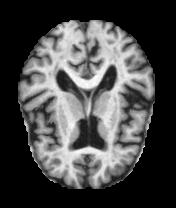

training sample - moderate demented


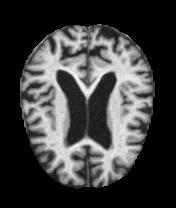

training sample - non demented


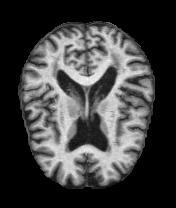

training sample - very mild demented


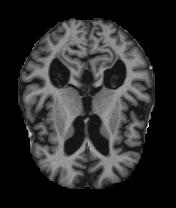

In [15]:
# printing images from each set - random numbers
print("training sample - mild demented")
display(Image.open(train_DIR+'MildDemented/mildDem414.jpg', 'r'))

print("training sample - moderate demented")
display(Image.open(train_DIR+'moderateDemented/moderateDem50.jpg', 'r'))

print("training sample - non demented")
display(Image.open(train_DIR+'NonDemented/nonDem1771.jpg', 'r'))

print("training sample - very mild demented")
display(Image.open(train_DIR+'VeryMildDemented/verymildDem567.jpg', 'r'))

testing sample - mild demented


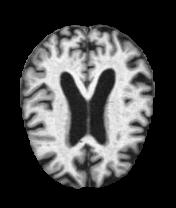

testing sample - moderate demented


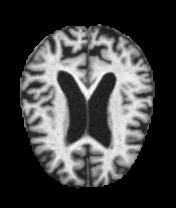

testing sample - non demented


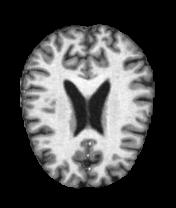

testing sample - very mild demented


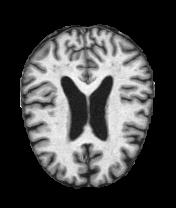

In [9]:
# printing images from each set
print("testing sample - mild demented")
display(Image.open(test_DIR+'MildDemented/0.jpg', 'r'))

print("testing sample - moderate demented")
display(Image.open(test_DIR+'moderateDemented/0.jpg', 'r'))

print("testing sample - non demented")
display(Image.open(test_DIR+'NonDemented/0.jpg', 'r'))

print("testing sample - very mild demented")
display(Image.open(test_DIR+'VeryMildDemented/0.jpg', 'r'))

Dataset1 contained labeled samples of images. The images were divided into two folder: test and train, which had even more folders labled as Mild Demented, Moderate Demented, Non Demented, and Very Mild Demented. 

There are 5121 training samples that are classified as 
	<br> <b> Mild Demented: 717 </b> </br>
	<br> <b> Moderate Demented: 52 </b> </br>
	<br> <b> Non Demented: 2560 </b> </br>
	<br> <b> Very Mild Demented 1792 </b> </br>
 
There are 1279 testing samples that are classified as 
	<br> <b> Mild Demented: 179 </b> </br>
	<br> <b> Moderate Demented: 12 </b> </br>
	<br> <b> Non Demented: 640 </b> </br>
	<br> <b> Very Mild Demented 448 </b> </br>

As we can see there are significantly more samples labeled Very Mild Demented and Non Demented, so I expect less accuracy for Mild and Moderate Demented samples. Also just by judging the images, I am unable to really tell the difference between these samples (since I'm not trained to look at MRIs :P ) so I'm interested in seeing how this will perform.

Since the data was just a raw set of images, it's hard to make any meaningful conclusions about them so far. 

The goal of this assignment is to use the training images, all of which were of width <b> 176 </b> and height <b> 208 </b>, to classify the testing images as one of the 4 categories (a stage of Alzheimer's), and see whether it is accurate [1]. 

# b - Preprocessing

As all of the images are the same size, there is no need to adjust them. They also look grayscale, but I will manually convert them to ensure that they are loaded as grayscale 2D array as opposed to RGB 3D. However, I will transform the images in the training into a DataFrame, where each row corresponds to the training sample. There will be 5121 rows which have 208x176 = 36608 features, whose values range from [0 255] to represent grayscale values. The labels will be encoded using label encoding since it is simpler to add into the dataframe and they have order such that 
<p> 0 = NonDemented; 1 = VeryMildDemented; 2 = MildDemented, 3 = ModerateDemented </p>

I will use Pillow to explore and collect the image data [2]. 


In [10]:
# initialize dataframe
encoding = {'NonDemented':0, 'VeryMildDemented':1, 'MildDemented':2, 'ModerateDemented':3}
cols = [x for x in range(36608)]
cols.append('Label')
df = pd.DataFrame(columns=cols)

In [11]:
# load each image and store it + label into dataframe
for file in os.listdir(train_DIR+'NonDemented'):
    im = np.array(Image.open(train_DIR+'NonDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(0) # appending the appropriate label for NonDemented
    # append to df
    df.loc[len(df)] = im

In [12]:
# load each image and store it + label into dataframe
for file in os.listdir(train_DIR+'VeryMildDemented'):
    im = np.array(Image.open(train_DIR+'VeryMildDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(1) # appending the appropriate label for VeryMildDemented
    # append to df
    df.loc[len(df)] = im

In [13]:
# load each image and store it + label into dataframe
for file in os.listdir(train_DIR+'MildDemented'):
    im = np.array(Image.open(train_DIR+'MildDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(2) # appending the appropriate label for MildDemented
    # append to df
    df.loc[len(df)] = im

In [14]:
# load each image and store it + label into dataframe
for file in os.listdir(train_DIR+'ModerateDemented'):
    im = np.array(Image.open(train_DIR+'ModerateDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(3) # appending the appropriate label for ModerateDemented
    # append to df
    df.loc[len(df)] = im

In [15]:
print(len(df)) 
# length should equal number of training samples: 5121

5121


In [16]:
# make df_train and df_test just for simplicity
df_train = df
df_test = pd.DataFrame(columns=cols)

# repeat procedure for testing data
# load each image and store it + label into dataframe
for file in os.listdir(test_DIR+'NonDemented'):
    im = np.array(Image.open(test_DIR+'NonDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(0) # appending the appropriate label for NonDemented
    # append to df_test
    df_test.loc[len(df_test)] = im

# load each image and store it + label into dataframe
for file in os.listdir(test_DIR+'VeryMildDemented'):
    im = np.array(Image.open(test_DIR+'VeryMildDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(1) # appending the appropriate label for VeryMildDemented
    # append to df_test
    df_test.loc[len(df_test)] = im

# load each image and store it + label into dataframe
for file in os.listdir(test_DIR+'MildDemented'):
    im = np.array(Image.open(test_DIR+'MildDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(2) # appending the appropriate label for MildDemented
    # append to df_test
    df_test.loc[len(df_test)] = im

# load each image and store it + label into dataframe
for file in os.listdir(test_DIR+'ModerateDemented'):
    im = np.array(Image.open(test_DIR+'ModerateDemented/'+file).convert("L"))
    # im is 2D array - we want to ravel to 1D array size 36608
    im = im.ravel().tolist()
    im.append(3) # appending the appropriate label for ModerateDemented
    # append to df_test
    df_test.loc[len(df_test)] = im

In [18]:
print(len(df_test)) 
# length should equal number of training samples: 1279

1279


The data has been included in their respective dataframes. 

In [21]:
df_train.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Label
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_test.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Label
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# let's show an example distribution of pixel values in a training and testing image
# training first - these are just first images from each class
img1 = df_train[df_train.Label==0].iloc[0] # non-demented
img2 = df_train[df_train.Label==1].iloc[0] # very mild demented 
img3 = df_train[df_train.Label==2].iloc[0] # mild demented
img4 = df_train[df_train.Label==3].iloc[0] # moderate demented


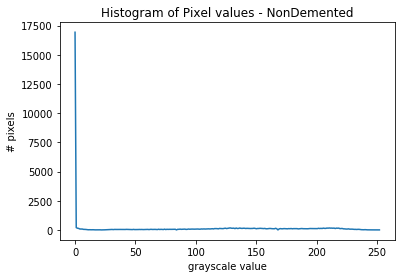

In [31]:
histogram, bin_edges = np.histogram(img1[0:len(img1)-1], bins=256)
plt.title("Histogram of Pixel values - NonDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

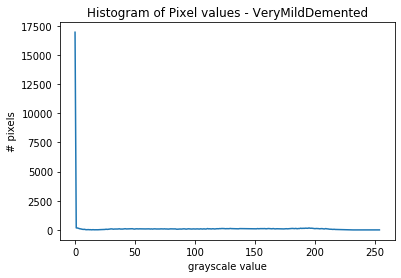

In [32]:
histogram, bin_edges = np.histogram(img2[0:len(img2)-1], bins=256)
plt.title("Histogram of Pixel values - VeryMildDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

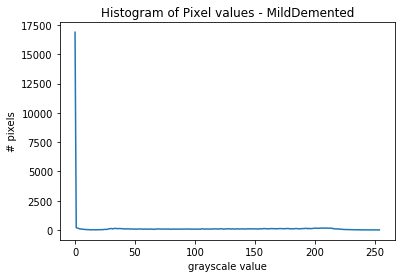

In [33]:
histogram, bin_edges = np.histogram(img3[0:len(img3)-1], bins=256)
plt.title("Histogram of Pixel values - MildDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

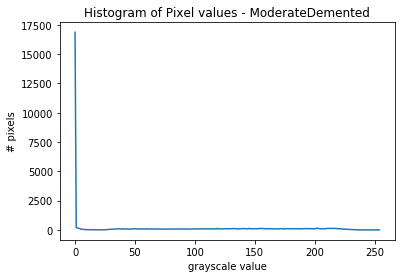

In [34]:
histogram, bin_edges = np.histogram(img4[0:len(img4)-1], bins=256)
plt.title("Histogram of Pixel values - ModerateDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

In [25]:
# testing  - these are just random images from each class
img1 = df_test[df_test.Label==0].iloc[0] # non-demented
img2 = df_test[df_test.Label==1].iloc[0] # very mild demented 
img3 = df_test[df_test.Label==2].iloc[0] # mild demented
img4 = df_test[df_test.Label==3].iloc[0] # moderate demented


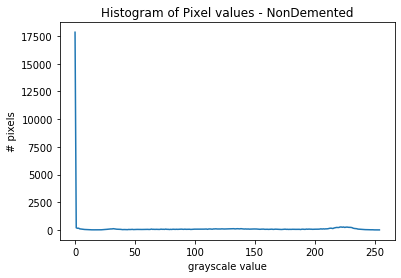

In [26]:
histogram, bin_edges = np.histogram(img1[0:len(img1)-1], bins=256)
plt.title("Histogram of Pixel values - NonDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

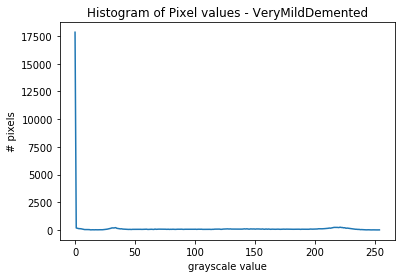

In [27]:
histogram, bin_edges = np.histogram(img2[0:len(img2)-1], bins=256)
plt.title("Histogram of Pixel values - VeryMildDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

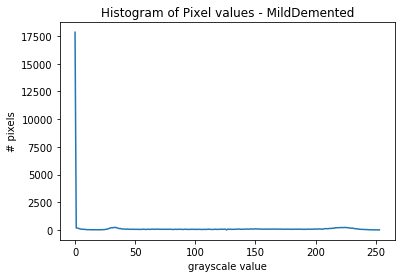

In [28]:
histogram, bin_edges = np.histogram(img3[0:len(img3)-1], bins=256)
plt.title("Histogram of Pixel values - MildDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

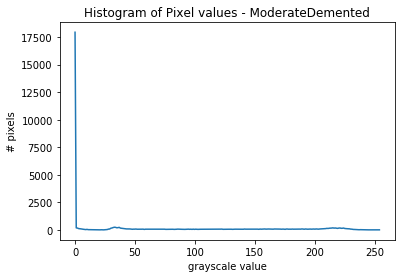

In [29]:
histogram, bin_edges = np.histogram(img4[0:len(img4)-1], bins=256)
plt.title("Histogram of Pixel values - ModerateDemented")
plt.xlabel("grayscale value")
plt.ylabel("# pixels")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

Clearly an abundance of pixels are 0 aka black, which makes sense since the background of the images is black. We can see some really small peaks betwenn [0 50] and [200 250] but it doesn't seem like there is a pattern depending on the type of image it is. I hope to reduce a lot of these pixel values via PCA.

In [26]:
# # I am storing the dataframe values into their own csv files to make future running more simpler. Running the cells in part C took hours 
# df_train.to_csv(train_DIR+'training.csv',index=False)
# df_test.to_csv(test_DIR+'testing.csv',index=False)

In [84]:
# # open the directories containing testing and training images
# df_train = pd.read_csv('Dataset1/train/training.csv')
# df_test = pd.read_csv('Dataset1/test/testing.csv')

In [4]:
# use PCA as a denoising tool for pixel data
# separate dataframe into X and y
y = df_train['Label']
X = df_train.loc[:, df_train.columns != 'Label']

In [5]:
# get mean and std vectors of training set
from sklearn import preprocessing as sklpp

# create an instance of the StandardScaler() object
mean_datascaler = sklpp.StandardScaler(with_mean=True,with_std=False) 
# fit transform to center the data with mean 
skl_centered_X = mean_datascaler.fit_transform(X)


I had to center the data matrix X in order to perform PCA in the following step - PCA requires the data to be centered. I will not scale (fully standardize) the data since all variables follow the same scale (pixel value).

# c - Feature Extraction/Learning

In [6]:
from sklearn import decomposition as skldecomp
# perform PCA - create an instance of the PCA() object that captures 95% of the variation in the dataset
data_pca = skldecomp.PCA(n_components=0.95, svd_solver='full')
# use fit_transform API to simultaneously compute PCA features & directions
train_features = data_pca.fit_transform(skl_centered_X) 

In [7]:
pca_components = data_pca.components_
print(len(pca_components))

691


In [8]:
print(train_features) # a sneak peak of features

[[-3.25117888e+03 -1.85878864e+03  1.73603373e+03 ... -6.66193621e+00
  -8.26638245e+01 -6.96138312e+01]
 [-2.18561184e+03  6.50168510e+02  2.80978351e+03 ... -6.43481474e+01
  -7.70360906e+00  1.25482564e+02]
 [-2.56911585e+03 -3.80556894e+03  1.23586782e+03 ... -2.71553012e+01
   7.98325736e+01 -1.12181754e+02]
 ...
 [-4.03544176e+03 -2.59954332e+02  1.86935684e+03 ... -4.68381726e+01
  -2.97719085e+01 -1.43802572e+01]
 [-3.90641869e+03  1.33222479e+03  1.36160354e+03 ... -6.23553320e+01
  -5.30741130e+01 -7.57690726e-01]
 [-3.85302915e+03 -8.40452389e+01  1.42710605e+03 ... -5.89316198e+00
  -1.05704292e+02  8.83968863e+00]]


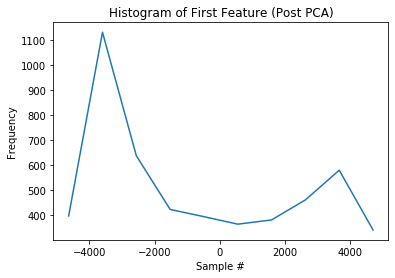

In [5]:
histogram, bin_edges = np.histogram(train_features[:,0])
plt.title("Histogram of First Feature (Post PCA)")
plt.xlabel("Sample #")
plt.ylabel("Frequency")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

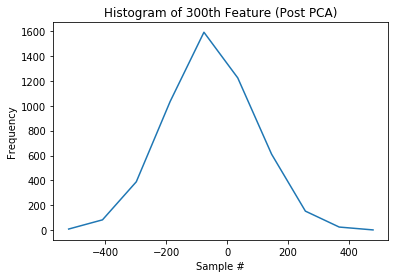

In [6]:
histogram, bin_edges = np.histogram(train_features[:,299])
plt.title("Histogram of 300th Feature (Post PCA)")
plt.xlabel("Sample #")
plt.ylabel("Frequency")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

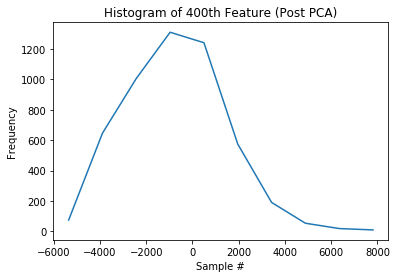

In [10]:
histogram, bin_edges = np.histogram(train_features[:,1])
plt.title("Histogram of 2nd Feature (Post PCA)")
plt.xlabel("Sample #")
plt.ylabel("Frequency")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

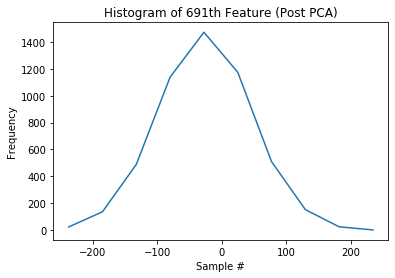

In [26]:
histogram, bin_edges = np.histogram(train_features[:,690])
plt.title("Histogram of 691th Feature (Post PCA)")
plt.xlabel("Sample #")
plt.ylabel("Frequency")

plt.plot(bin_edges[0:-1], histogram) 
plt.show()

So probably most of the feature histograms have some Gaussian distribution, but of course not all of them.

In [9]:
print(np.linalg.matrix_rank(train_features))
print(np.linalg.matrix_rank(X.to_numpy().astype('float')))

691
5121


In the steps above I separated my training dataset into X and y matrices. Then, in order to perform PCA to reduce the dimensions of the dataset, I had to centere the dataset [3], since PCA assumes data to be centered (0 mean). The PCA method I chose captures 95% of the variation in the dataset [4]. The result was 691 PCA components, a huge reductionn from 36608 (about 98% decrease in number of features). The resulting features are assigned to the <b> train_features </b> variable. Note that we only train PCA on training data only (thus far).

By printing the rank of the new reduced sample set, we can see that it is actually full rank and equals the reduced number of features we have. Printing the rank of the original dataset X shows , the rank was equal to the number of rows (as expected).

In [2]:
# temp dataframe to seperate by class
ex = pd.DataFrame(train_features)
ex['Label'] = y

In [3]:
ex.loc[ex['Label'] == 0].cov()

,0,1,2,3,4,5,6,7,8,9,...,682,683,684,685,686,687,688,689,690,Label
0,8.565054e+06,-8.702320e+04,-1.555369e+04,1.715885e+05,136446.285948,-619208.459693,317747.795726,24858.753029,-223848.664396,-41761.309983,...,2021.703391,-7167.240714,-8790.756850,-1557.617884,-5394.216948,1409.864133,1455.940168,-2761.430130,-3912.724796,0.0
1,-8.702320e+04,3.900306e+06,-4.524561e+04,-4.309898e+04,-19956.460859,218399.103101,-62648.026477,-249997.645867,-74122.858907,-89831.294244,...,287.265899,-1361.499840,-2350.396870,-1391.344196,130.044321,3181.121091,1660.909240,1605.986328,2604.574690,0.0
2,-1.555369e+04,-4.524561e+04,3.245657e+06,-3.265193e+03,-67508.694450,-191323.778588,-131102.975541,-84004.525617,-2980.387455,168197.621785,...,-1343.827235,3489.299335,-6094.173847,668.002742,6574.330092,-2355.090784,4847.259933,-1011.578418,-2177.541141,0.0
3,1.715885e+05,-4.309898e+04,-3.265193e+03,1.039038e+06,-52232.208748,-20261.824451,7456.259713,76868.496640,10149.425113,-8713.981552,...,-2.688356,131.247948,2727.596590,-706.220150,1361.740262,1788.177996,-1436.920660,-1418.589149,-1646.359406,0.0
4,1.364463e+05,-1.995646e+04,-6.750869e+04,-5.223221e+04,892674.676444,-6089.846347,-9525.024178,-19964.387902,6100.159801,56709.378204,...,1377.146049,-1288.257407,1073.873936,1732.249939,483.800000,298.148078,-128.481989,-1189.720498,-220.524192,0.0
5,-6.192085e+05,2.183991e+05,-1.913238e+05,-2.026182e+04,-6089.846347,711191.348701,14733.269673,68567.161204,14145.712252,-38418.415367,...,47.521134,-522.566857,-508.693253,1289.258237,346.601749,-2066.470511,999.587016,475.019876,-472.736423,0.0
6,3.177478e+05,-6.264803e+04,-1.311030e+05,7.456260e+03,-9525.024178,14733.269673,563767.067879,-12415.335554,-13857.165332,27182.140772,...,64.304557,-632.152412,-1030.878016,-1208.026478,-2977.347750,-1590.963780,-500.793836,-468.349074,-195.437004,0.0
7,2.485875e+04,-2.499976e+05,-8.400453e+04,7.686850e+04,-19964.387902,68567.161204,-12415.335554,366925.401908,-29410.148820,43722.113289,...,117.046923,1953.504765,346.751790,-1375.835640,487.722037,-1533.755397,664.919256,-885.298700,1000.013617,0.0
8,-2.238487e+05,-7.412286e+04,-2.980387e+03,1.014943e+04,6100.159801,14145.712252,-13857.165332,-29410.148820,382164.258342,-5078.474005,...,-995.329756,451.163164,1003.811408,75.352355,-1750.160610,623.061350,142.836774,-656.804780,-1496.796288,0.0
9,-4.176131e+04,-8.983129e+04,1.681976e+05,-8.713982e+03,56709.378204,-38418.415367,27182.140772,43722.113289,-5078.474005,316353.838911,...,780.212439,859.365303,27.731393,-557.810146,-1443.899981,677.815353,-1067.044232,1394.599874,-30.300217,0.0


In [4]:
ex.loc[ex['Label'] == 1].cov()

,0,1,2,3,4,5,6,7,8,9,...,682,683,684,685,686,687,688,689,690,Label
0,9.347329e+06,-2.012057e+04,3.504671e+04,-8.126742e+04,-32999.201334,378139.820681,-245946.364025,13991.624288,163694.461264,17566.754855,...,-3625.625561,5865.934519,13769.521098,-675.552866,11281.326851,667.299667,-7944.537260,650.539372,7264.449229,0.0
1,-2.012057e+04,3.822642e+06,1.048781e+05,2.516795e+05,103057.719579,88599.099544,43381.164531,352556.264137,99650.151109,23603.217513,...,867.481475,-1534.146931,1189.361421,2527.002780,182.631440,-3857.686928,-3290.441413,-3031.958319,-8168.446658,0.0
2,3.504671e+04,1.048781e+05,3.484530e+06,3.459416e+04,31537.784932,90432.559826,65425.325028,109754.811719,9746.323443,-105723.864690,...,5726.190289,-7119.661188,4217.264762,-2938.249583,-6107.030626,-3479.237909,-4752.868195,-1453.777098,971.884613,0.0
3,-8.126742e+04,2.516795e+05,3.459416e+04,1.503242e+06,54534.958568,18221.895680,17542.521164,-104131.162071,-11881.937303,12117.038614,...,1671.963883,-1172.910599,-1460.090493,-463.907656,-1054.854542,-2073.828140,2126.157250,1703.526840,1531.164432,0.0
4,-3.299920e+04,1.030577e+05,3.153778e+04,5.453496e+04,912405.486946,-13782.748757,-588.118996,-9500.339118,-9284.454960,-25316.397035,...,-1765.560529,1522.804895,785.910874,-4744.728836,1250.036105,-447.053625,-37.603779,-379.813551,-2196.381898,0.0
5,3.781398e+05,8.859910e+04,9.043256e+04,1.822190e+04,-13782.748757,604913.777898,-13120.727463,-46505.763989,-20037.684673,37346.049716,...,-10.748546,-439.973107,923.726484,-1399.960810,-907.641831,1852.378133,-1649.305982,-1406.984905,797.434923,0.0
6,-2.459464e+05,4.338116e+04,6.542533e+04,1.754252e+04,-588.118996,-13120.727463,594537.833795,-4622.690885,15945.111918,-28536.162900,...,-1441.228719,405.071829,-1884.881395,1611.673302,4046.439375,-6.337739,945.798470,-20.939458,-114.537979,0.0
7,1.399162e+04,3.525563e+05,1.097548e+05,-1.041312e+05,-9500.339118,-46505.763989,-4622.690885,400141.762826,39892.549979,-37069.406391,...,-396.176848,-1665.943136,-526.820321,459.677278,-698.549164,1436.332463,-912.127590,-565.037955,-1347.130601,0.0
8,1.636945e+05,9.965015e+04,9.746323e+03,-1.188194e+04,-9284.454960,-20037.684673,15945.111918,39892.549979,344971.129211,4365.640309,...,1050.295084,-371.688959,-2374.518358,764.593632,1014.852822,-180.032125,56.008462,-76.213380,855.517597,0.0
9,1.756675e+04,2.360322e+04,-1.057239e+05,1.211704e+04,-25316.397035,37346.049716,-28536.162900,-37069.406391,4365.640309,321866.227780,...,-1595.781352,-722.949198,936.985977,735.540462,0.536253,-1382.719808,1920.002017,-974.191444,1216.215112,0.0


In [5]:
ex.loc[ex['Label'] == 2].cov()

,0,1,2,3,4,5,6,7,8,9,...,682,683,684,685,686,687,688,689,690,Label
0,9.816482e+06,3.461818e+05,-1.388625e+04,-3.805914e+05,-417318.536658,1.192532e+06,-467295.804955,-141459.104088,347670.366000,95189.954914,...,1900.378109,14323.729506,-5047.758214,6517.966308,-6671.677718,-6856.040485,13495.233358,942.755641,-5939.263177,0.0
1,3.461818e+05,2.407556e+06,-2.856154e+05,8.572683e+04,191006.851255,-2.577898e+05,80348.825009,632057.873420,196109.023363,78767.531058,...,2380.920983,-484.239550,6381.886223,2409.842509,4068.626457,-1523.386050,-3877.747636,4896.538052,-5781.331364,0.0
2,-1.388625e+04,-2.856154e+05,3.209971e+06,-2.537611e+04,145294.278524,4.604013e+05,291478.860403,22823.582478,19128.366678,-320422.800183,...,-8149.247839,4602.151356,12563.659860,7446.679023,-6197.781032,16892.671971,-4853.289028,8205.781787,7539.228305,0.0
3,-3.805914e+05,8.572683e+04,-2.537611e+04,1.035730e+06,24531.676213,-5.280120e+04,-51013.224329,-77855.899676,-47532.491136,19398.504524,...,-5309.372300,2453.868866,-5332.754117,5066.064893,-4398.352382,-1613.176611,-745.113053,304.520695,4535.528422,0.0
4,-4.173185e+05,1.910069e+05,1.452943e+05,2.453168e+04,988260.091016,-5.965330e+03,42713.370558,46407.582490,-11816.339551,-117096.178255,...,-898.603582,1797.219617,-6454.051134,6675.173261,-4677.889407,1016.751341,541.363449,4438.335126,7313.418659,0.0
5,1.192532e+06,-2.577898e+05,4.604013e+05,-5.280120e+04,-5965.330004,6.894266e+05,-21920.649947,-209122.255135,-33775.181094,71980.504538,...,-875.428218,4728.785466,62.027951,-189.481768,584.922680,2847.523293,910.518058,1556.386738,2648.751213,0.0
6,-4.672958e+05,8.034883e+04,2.914789e+05,-5.101322e+04,42713.370558,-2.192065e+04,592290.587940,66363.828948,24531.592062,-34640.918372,...,3610.261416,1538.876484,8379.556984,781.617584,1139.633060,6176.253403,315.229633,4376.398213,507.351329,0.0
7,-1.414591e+05,6.320579e+05,2.282358e+04,-7.785590e+04,46407.582490,-2.091223e+05,66363.828948,517310.683154,-18554.198253,-45171.226420,...,1106.486142,-2007.283340,-1325.582189,3513.591524,-1286.349803,2785.356645,1299.074625,3192.496341,1210.992084,0.0
8,3.476704e+05,1.961090e+05,1.912837e+04,-4.753249e+04,-11816.339551,-3.377518e+04,24531.592062,-18554.198253,366588.762218,11069.889812,...,766.630848,-1666.846348,1874.474358,-955.245489,2173.717577,-1732.331453,-269.393024,468.385195,1849.920347,0.0
9,9.518995e+04,7.876753e+04,-3.204228e+05,1.939850e+04,-117096.178255,7.198050e+04,-34640.918372,-45171.226420,11069.889812,392355.282534,...,2059.815279,-1383.620410,-2672.130246,-317.832798,4801.447983,1184.651434,-1175.428613,-2257.759519,-4266.653401,0.0


In [6]:
ex.loc[ex['Label'] == 3].cov()

,0,1,2,3,4,5,6,7,8,9,...,682,683,684,685,686,687,688,689,690,Label
0,9.974739e+06,2.729863e+04,-3.398950e+05,-472526.963975,137167.744065,941894.508883,-666916.870439,528277.006800,6.273530e+05,210787.452125,...,-15151.806698,-46765.972108,39854.031028,20178.013463,-19977.026598,-1173.556602,6004.420108,104361.656722,33952.350926,0.0
1,2.729863e+04,2.615709e+06,-6.133383e+05,682646.265331,-101457.741667,-100716.676180,-204625.180453,-259094.037904,1.020135e+06,130185.378827,...,-5351.017905,32493.407956,-3372.567149,-48111.782452,56394.199509,9538.704581,24898.413307,26615.955104,21281.488904,0.0
2,-3.398950e+05,-6.133383e+05,3.369518e+06,-401546.373681,394857.824293,341363.868792,207524.954451,418743.333830,-2.903062e+05,-297150.912910,...,-24609.042589,5335.099077,-18617.401485,-24538.617848,-15275.261957,9272.129610,-13823.215458,-11047.708910,-37842.628028,0.0
3,-4.725270e+05,6.826463e+05,-4.015464e+05,461301.571020,-320498.890183,-152151.267232,-138477.561615,-78667.743967,1.844339e+05,62353.111732,...,-1990.189771,10292.162073,-12740.427869,-8305.179158,24470.358026,11026.952076,11902.970066,-1796.074327,-7626.196251,0.0
4,1.371677e+05,-1.014577e+05,3.948578e+05,-320498.890183,629588.505105,89836.741431,-6870.044216,52157.171956,-4.506537e+04,-110067.129833,...,-7347.345529,-8542.219220,5563.056005,-3523.003473,-4090.137117,-6659.620084,2894.505117,4647.699812,1415.127600,0.0
5,9.418945e+05,-1.007167e+05,3.413639e+05,-152151.267232,89836.741431,418240.713361,184724.468936,52644.475098,-1.236147e+04,-4308.174290,...,-10192.291313,-11360.715243,-5125.786155,-4070.210702,-2705.444009,-1114.484602,-1947.218498,-5715.871378,-6337.092612,0.0
6,-6.669169e+05,-2.046252e+05,2.075250e+05,-138477.561615,-6870.044216,184724.468936,613937.788680,-117521.797798,-1.874595e+05,69297.306583,...,4376.011747,-4740.111569,-1374.076074,-13964.745739,-13543.160813,-8939.186308,-9763.576743,-36488.621546,1816.425194,0.0
7,5.282770e+05,-2.590940e+05,4.187433e+05,-78667.743967,52157.171956,52644.475098,-117521.797798,143607.539246,-6.801396e+04,-40244.262618,...,-6177.705210,-3216.790384,-622.514857,3796.969828,-2504.015077,497.916889,-632.132854,7644.510366,-7676.626211,0.0
8,6.273530e+05,1.020135e+06,-2.903062e+05,184433.877584,-45065.368473,-12361.471461,-187459.509417,-68013.956048,5.563763e+05,54605.898639,...,832.323924,18686.006029,6551.151819,-20019.126125,13740.338740,-2794.784633,-1787.129533,25943.231813,29038.313137,0.0
9,2.107875e+05,1.301854e+05,-2.971509e+05,62353.111732,-110067.129833,-4308.174290,69297.306583,-40244.262618,5.460590e+04,111906.386840,...,-3905.761612,-1451.035745,1138.619900,1621.335639,4385.772110,-2595.678614,3732.688177,-1958.706978,8754.295918,0.0


The class covariance matrices are different for each output.

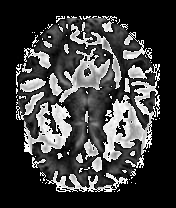

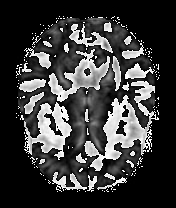

In [39]:
# show an example of image after PCA component projection

original = skl_centered_X[0]
original = np.reshape(original,(208,176))
display(Image.fromarray(np.uint8(original)))

ex_pca_image_proj = data_pca.inverse_transform(train_features[0])
ex_pca_image_array = np.reshape(ex_pca_image_proj,(208,176))
display(Image.fromarray(np.uint8(ex_pca_image_array)))


The reconstructed image from PCA is very similar to the original (centered) sample.

There are too many samples and dimensions to be able to see the distribution of independent variables. 

In [75]:
# store test data as X and y 
y_test = df_test['Label']
X_test = df_test.loc[:, df_test.columns != 'Label']

# transform test data on the mean_datascaler and data_pca computed from training data
test_features = data_pca.transform(mean_datascaler.transform(X_test))

The test features have been created by first standardizing the data in terms of the training data's mean vectors and then transforming the centered data with the pca components [3,4].
It is required to perform the exact same transformations on the testing data (or any new samples).

In [79]:
# I am storing the pca feature values into their own csv files to make future running more simpler in the future
np.savetxt(train_DIR+'transformed_training.txt', train_features)
np.savetxt(train_DIR+'training_labels.txt',y)

np.savetxt(test_DIR+'transformed_testing.txt', test_features)
np.savetxt(test_DIR+'testing_labels.txt',y_test)

In [37]:
# train_features = np.loadtxt('Dataset1/train/transformed_training.txt')

# d - Processing

### Model 1 - QDA

The first machine learning model I will learn for classification is a QDA decision boundary using the components we have learned from PCA. The hyperparameter I will be tuning with validation for QDA is the only variable that can be tuned - the reg_param. While QDA has a closed-form solution, what the regularization parameter in this case does is regularizes the class-covariance estimates when the number of samples is small (though in our case it isn't) with the formula
<p> (1-reg_param)*sigma + reg_param*np.eye(n_features) </p> 

where np.eye(n_features) is just a diagonal matrix with 1s on the diagonal (identity) and sigma corresponds to the SVD of training_features belonging to each class (sigma = svd^2 / (n_samples_class_i - 1)). Default reg_param = 0, but I will be testing values 0.0, 0.01, 0.02, 0.03, 0.04 and 0.05, keeping the values small enough to see if there is a large difference [5].

Therfore, I am training a total of 6 different QDA models. 

I will use stratified k-fold cross validation, with k = 6 to ensure that each split contains equal samples for each class - that is, the ratio of samples belongin to each classification is preserved among the fold [6]. I chose this way of splitting the dataset since there aren't an equal number of samples for each of the 4 classes. I will train each classifier on 5 folds and report the error on the 6th fold.

In [53]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# initialize the QSA classifiers to train
# note that prior probs set to None will automatically calculate the probabilities for each class
qda_0 = QDA(priors=None, reg_param=0.00, store_covariance=True)
qda_1 = QDA(priors=None, reg_param=0.01, store_covariance=True)
qda_2 = QDA(priors=None, reg_param=0.02, store_covariance=True)
qda_3 = QDA(priors=None, reg_param=0.03, store_covariance=True)
qda_4 = QDA(priors=None, reg_param=0.04, store_covariance=True)
qda_5 = QDA(priors=None, reg_param=0.05, store_covariance=True)

In [65]:
# split training data into k-folds
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=6)
skf.get_n_splits(train_features, y)

# function for getting accuracy
def get_accuracy(y_test, y_pred):
    total = len(y_test)
    missed = 0
    for i in range(total):
        if y_test[i] != y_pred[i]:
            missed+=1
    return (1-missed/total, missed/total)

# get the cross validation scores for each classifier 
clfs = [qda_0, qda_1, qda_2, qda_3, qda_4, qda_5] # list of classifiers
scores = [] # list of accuracies
i = 0

for train_index, test_index in skf.split(train_features, y):
    X_train, X_val = train_features[train_index], train_features[test_index]
    y_train, y_val = y[train_index], y[test_index]
    # fit classifier on folds
    clfs[i].fit(X_train,y_train) 
    # make predictions and return accuracy
    predictions = clfs[i].predict(X_val)
    y_val = np.asarray(y_val).astype('int')
    scores.append(get_accuracy(y_val,predictions))
    i += 1

C:\Users\prpar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\prpar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\prpar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\prpar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\prpar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\prpar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [64]:
print(qda_0.covariance_)# shows calculated cov matrices for each class

[array([[ 9.73690146e+06, -1.31290653e+05, -2.88123611e+05, ...,
         6.80046980e+02, -4.33124745e+03, -4.28135542e+03],
       [-1.31290653e+05,  3.85826229e+06,  2.20945734e+04, ...,
         2.45959355e+03,  2.52546658e+03,  3.75400214e+03],
       [-2.88123611e+05,  2.20945734e+04,  2.88077675e+06, ...,
         7.50226368e+03, -2.83285509e+03, -1.50557965e+03],
       ...,
       [ 6.80046980e+02,  2.45959355e+03,  7.50226368e+03, ...,
         4.85756210e+03,  6.69911402e+01, -1.78168443e+02],
       [-4.33124745e+03,  2.52546658e+03, -2.83285509e+03, ...,
         6.69911402e+01,  5.46436265e+03,  2.38683508e+00],
       [-4.28135542e+03,  3.75400214e+03, -1.50557965e+03, ...,
        -1.78168443e+02,  2.38683508e+00,  4.93440999e+03]]), array([[ 1.04924427e+07, -1.56824120e+05,  6.54384065e+05, ...,
        -1.34520300e+04,  1.42767969e+03,  9.14117872e+03],
       [-1.56824120e+05,  3.78118342e+06,  5.56663433e+04, ...,
         1.30919425e+03, -2.24491972e+03, -8.15827213

In [66]:
print(qda_2.covariance_)# shows calculated cov matrices for each class

[array([[ 7.87987063e+06, -1.73020832e+05,  2.57801782e+05, ...,
         1.45364553e+03, -8.05003194e+03, -2.00107307e+03],
       [-1.73020832e+05,  3.70563286e+06, -1.26673120e+05, ...,
         2.83185610e+02, -9.62564478e+02,  1.66248745e+03],
       [ 2.57801782e+05, -1.26673120e+05,  3.54728248e+06, ...,
         5.27151429e+03, -3.95611125e+02, -2.40547057e+03],
       ...,
       [ 1.45364553e+03,  2.83185610e+02,  5.27151429e+03, ...,
         4.62973234e+03,  1.21872573e+02, -1.86948213e+02],
       [-8.05003194e+03, -9.62564478e+02, -3.95611125e+02, ...,
         1.21872573e+02,  5.30438365e+03, -2.13973050e+01],
       [-2.00107307e+03,  1.66248745e+03, -2.40547057e+03, ...,
        -1.86948213e+02, -2.13973050e+01,  4.76894754e+03]]), array([[ 6.75186991e+06,  3.68033444e+05, -1.57613112e+06, ...,
         3.89190214e+02,  3.01138821e+02,  1.14809777e+04],
       [ 3.68033444e+05,  3.65001734e+06,  2.72674715e+05, ...,
        -6.17792977e+03, -6.22817902e+03, -8.69587631

the regularization parameter modified the cov estimates as seen above.

In [62]:
# print the accuracy and error for each model
print('Accuracy and Error for QDA with reg_param=0.0:')
print(scores[0])
print('\nAccuracy and Error for QDA with reg_param=0.1:')
print(scores[1])
print('\nAccuracy and Error for QDA with reg_param=0.2:')
print(scores[2])
print('\nAccuracy and Error for QDA with reg_param=0.3:')
print(scores[3])
print('\nAccuracy and Error for QDA with reg_param=0.4:')
print(scores[4])
print('\nAccuracy and Error for QDA with reg_param=0.5:')
print(scores[5])

Accuracy and Error for QDA with reg_param=0.0:
(0.8079625292740047, 0.1920374707259953)

Accuracy and Error for QDA with reg_param=0.1:
(0.8231850117096019, 0.17681498829039813)

Accuracy and Error for QDA with reg_param=0.2:
(0.6288056206088992, 0.3711943793911007)

Accuracy and Error for QDA with reg_param=0.3:
(0.779601406799531, 0.22039859320046892)

Accuracy and Error for QDA with reg_param=0.4:
(0.7960140679953107, 0.20398593200468934)

Accuracy and Error for QDA with reg_param=0.5:
(0.8218053927315357, 0.17819460726846426)


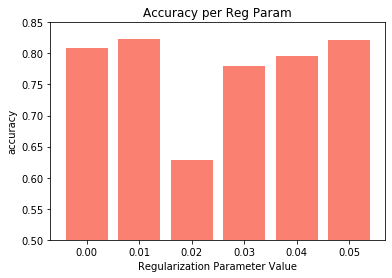

In [18]:
# bar chart for fun
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

plt.bar(['0.00','0.01','0.02','0.03','0.04','0.05'], 
        [scores[x][0] for x in range(6)], color = 'salmon')
plt.xlabel('Regularization Parameter Value')
plt.ylabel('accuracy')
plt.ylim([0.5,0.85])
plt.title('Accuracy per Reg Param')
plt.show()

The warnings I see from earlier show that even after performing PCA, some variables were collinear. This could be the reason for why some covariance values were negative, as shown in the qda_0.covariance_ attribute.

As we can see, the accuracy was highest for when the reg_param = 0.01. The overally accuracies of the models is  lowest for reg_param = 0.02. 

Therefore after performing cross-validation, I have chosen the QDA with reg_param = 0.01 to be the first model, which has an average accuracy of about 82.3%. 

### Model 2 - k-Nearest Neighbors

The second machine learning model I will learn for classification is the k-NN decision boundary using the components we have learned from PCA Of course the hyperparamter we need to tune is k, the number of neighbors to check for. Ideally the value for k is odd, avoiding ties, and greater than 5 (since there are 4 possible classes). Therefore I will test k-NN with values of k being 5, 7, 9, 11. Another parameter to consider is weights i.e. weighting the neighbors for prediction - I am choosing to perform validation with the 'distance' option, where closer neighbors have more influence than farther ones, as well as 'uniform' where all neighbors are treated equally. The distance metric to be used is the Euclidean distance [7].

Therfore, I am training a total of 8 different k-NN models. 

I will use stratified k-fold cross validation, with k = 8 to ensure that each split contains equal samples for each class - that is, the ratio of samples belongin to each classification is preserved among the fold [6]. I chose this way of splitting the dataset since there aren't an equal number of samples for each of the 4 classes. I will train each classifier on 7 folds and report the error on the 8th fold.

In [86]:
from sklearn.neighbors import KNeighborsClassifier as kNN
kNN_5_d = kNN(n_neighbors=5, weights='distance', algorithm='auto', p=2)
kNN_5_u = kNN(n_neighbors=5, weights='uniform', algorithm='auto', p=2)

kNN_7_d = kNN(n_neighbors=7, weights='distance', algorithm='auto', p=2)
kNN_7_u = kNN(n_neighbors=7, weights='uniform', algorithm='auto', p=2)

kNN_9_d = kNN(n_neighbors=9, weights='distance', algorithm='auto', p=2)
kNN_9_u = kNN(n_neighbors=9, weights='uniform', algorithm='auto', p=2)

kNN_11_d = kNN(n_neighbors=11, weights='distance', algorithm='auto', p=2)
kNN_11_u = kNN(n_neighbors=11, weights='uniform', algorithm='auto', p=2)

In [87]:
# split training data into k-folds
skf = StratifiedKFold(n_splits=8)
skf.get_n_splits(train_features, y)

# get the cross validation scores for each classifier 
clfs = [kNN_5_d, kNN_5_u, kNN_7_d, kNN_7_u, kNN_9_d, kNN_9_u, kNN_11_d, kNN_11_u] # list of classifiers
scores = [] # list of accuracies
i = 0

for train_index, test_index in skf.split(train_features, y):
    X_train, X_val = train_features[train_index], train_features[test_index]
    y_train, y_val = y[train_index], y[test_index]
    # fit classifier on folds
    clfs[i].fit(X_train,y_train) 
    # make predictions and return accuracy
    predictions = clfs[i].predict(X_val)
    y_val = np.asarray(y_val).astype('int')
    scores.append(get_accuracy(y_val,predictions))
    i += 1

In [88]:
# print the average accuracy and error for each model
print('Accuracy and Error for 5-NN with weight=distance:')
print(scores[0])
print('\nAccuracy and Error for 5-NN with weight=uniform:')
print(scores[1])
print('\nAccuracy and Error for 7-NN with weight=distance:')
print(scores[2])
print('\nAccuracy and Error for 7-NN with weight=uniform:')
print(scores[3])
print('\nAccuracy and Error for 9-NN with weight=distance:')
print(scores[4])
print('\nAccuracy and Error for 9-NN with weight=uniform:')
print(scores[5])
print('\nAccuracy and Error for 11-NN with weight=distance:')
print(scores[6])
print('\nAccuracy and Error for 11-NN with weight=uniform:')
print(scores[7])

Accuracy and Error for 5-NN with weight=distance:
(0.9984399375975039, 0.0015600624024961)

Accuracy and Error for 5-NN with weight=uniform:
(0.975, 0.025)

Accuracy and Error for 7-NN with weight=distance:
(0.9921875, 0.0078125)

Accuracy and Error for 7-NN with weight=uniform:
(0.9671875, 0.0328125)

Accuracy and Error for 9-NN with weight=distance:
(0.9875, 0.0125)

Accuracy and Error for 9-NN with weight=uniform:
(0.934375, 0.065625)

Accuracy and Error for 11-NN with weight=distance:
(0.978125, 0.021875)

Accuracy and Error for 11-NN with weight=uniform:
(0.9046875, 0.0953125)


([<matplotlib.axis.XTick at 0x1ea3d118550>,
 <a list of 4 Text xticklabel objects>)

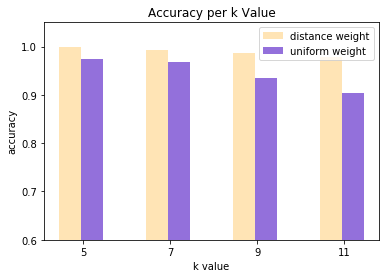

In [19]:
# bar chart for fun
x_width = np.arange(4)
plt.bar(x_width + 0.00, [scores[x][0] for x in range(0,7,2)], 
       color = 'moccasin', width = 0.25,label='distance weight')
plt.bar(x_width + 0.25, [scores[x][0] for x in range(1,8,2)], 
       color = 'mediumpurple', width = 0.25,label='uniform weight')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.ylim(0.6,1.05)
plt.title('Accuracy per k Value')
plt.legend()
plt.xticks([r + 0.15 for r in range(4)], ['5','7','9','11'])


We can see that overall, the most effective k value is 5, whose accuracy for both uniform and distance weights are higher than the rest. Also, a trend to notice is that as k increases, error is also likely to increase, especially for using uniform distances. Of the two models with k=5, it seems that weighing by distance is even more accurate at 99.8% - this is the one I will be mbving forward with for k-NN. 

### Model 3 - SVM

The final machine learning model I will learn for classification is the SVM using the components we have learned from PCA. There are many parameters that can be tuned using SVM - most notably, the regularization parameter C. SVM is preferred for classes that are separable, but in the real world where this may not occur. The parameter C is the lambda that we discussed in class; it is equal to the regularization parameter, which in turn is inverse to the total slack budget (total violations of margins). Therefore when C in this application is large, total slack is small, pushing the margins to be smaller; if C is smaller, the margin will be bigger 8]. This means that smaller C values == stronger regularization == increase in coeff values (less sparsity) == underfitting. I will test C values 0.5, 1, 1.5. Another parameter I'd like to test is the kernel. A linear kernel assumes that the data is linearly separable in the original dimension of ths samples. While this may not be true for smaller dimension, our training data is very large so it has the possibility to perfrom better. Therefore I will be training linear kernels first (this would be called SVC). I also want to see if a nonlinear polynomial kernel would be a better fit, so I will be testing polynomial kernels with the default degree 3. I will also be testing another nonlinear kernel function - radial basis function. The parameter that effects rbf is gamma , which is seens as the inverse of the radius that a training sample influences (1/sigma) [9]. For both polynomial and rbf kernels, I will set gamma to be default so that I can see the effect of C on the kernels better. 

Therfore, I am training a total of 9 different SVM models. 

I will use stratified k-fold cross validation, with k = 9 to ensure that each split contains equal samples for each class - that is, the ratio of samples belongin to each classification is preserved among the fold [6]. I chose this way of splitting the dataset since there aren't an equal number of samples for each of the 4 classes. I will train each classifier on 8 folds and report the error on the 9th fold.

In [56]:
from sklearn.svm import SVC 
# the models will be labeled as svm_kernel_c value (without decimal of course)
# note that I am also setting a tolerance limit - default is .0001, but I will use 0.005 in hopes of reducing computational cost 
# finally because SVM is a binary classifier, I will set the decision function shape to one-v-rest since it creates less classifiers than one-vs-one
svm_lin_05 = SVC(C=0.5, kernel='linear',tol=0.005,decision_function_shape='ovr')
svm_lin_10 = SVC(C=1.0, kernel='linear',tol=0.005,decision_function_shape='ovr')
svm_lin_15 = SVC(C=1.5, kernel='linear',tol=0.005,decision_function_shape='ovr')

svm_poly_05 = SVC(C=0.5,kernel='poly',degree=3,gamma='scale',tol=0.005,decision_function_shape='ovr')
svm_poly_10 = SVC(C=1.0,kernel='poly',degree=3,gamma='scale',tol=0.005,decision_function_shape='ovr')
svm_poly_15 = SVC(C=1.5,kernel='poly',degree=3,gamma='scale',tol=0.005,decision_function_shape='ovr')

svm_rbf_05 = SVC(C=0.5,kernel='rbf',gamma='scale',tol=0.005,decision_function_shape='ovr')
svm_rbf_10 = SVC(C=1.0,kernel='rbf',gamma='scale',tol=0.005,decision_function_shape='ovr')
svm_rbf_15 = SVC(C=1.5,kernel='rbf',gamma='scale',tol=0.005,decision_function_shape='ovr')

In [90]:
# split training data into k-folds
skf = StratifiedKFold(n_splits=9)
skf.get_n_splits(train_features, y)

# get the cross validation scores for each classifier 
clfs = [svm_lin_05, svm_lin_10, svm_lin_15, svm_poly_05, svm_poly_10, svm_poly_15, 
       svm_rbf_05, svm_rbf_10, svm_rbf_15]

# list of classifiers
scores = [] # list of accuracies
i = 0

for train_index, test_index in skf.split(train_features, y):
    X_train, X_val = train_features[train_index], train_features[test_index]
    y_train, y_val = y[train_index], y[test_index]
    # fit classifier on folds
    clfs[i].fit(X_train,y_train) 
    # make predictions and return accuracy
    predictions = clfs[i].predict(X_val)
    y_val = np.asarray(y_val).astype('int')
    scores.append(get_accuracy(y_val,predictions))
    i += 1

In [91]:
# print the average accuracy and error for each model
print('Accuracy and Error for Linear Kernel with C=0.5:')
print(scores[0])
print('\nAccuracy and Error for Linear Kernel with C=1.0:')
print(scores[1])
print('\nAccuracy and Error for Linear Kernel with C=1.5:')
print(scores[2])
print('\nAccuracy and Error for Poly Kernel with C=0.5:')
print(scores[3])
print('\nAccuracy and Error for Poly Kernel with C=1.0:')
print(scores[4])
print('\nAccuracy and Error for Poly Kernel with C=1.5:')
print(scores[5])
print('\nAccuracy and Error for RBF Kernel with C=0.5:')
print(scores[6])
print('\nAccuracy and Error for RBF Kernel with C=1.0:')
print(scores[7])
print('\nAccuracy and Error for RBF Kernel with C=1.5:')
print(scores[8])

Accuracy and Error for Linear Kernel with C=0.5:
(0.9718804920913884, 0.028119507908611598)

Accuracy and Error for Linear Kernel with C=1.0:
(0.9789103690685413, 0.0210896309314587)

Accuracy and Error for Linear Kernel with C=1.5:
(0.9718804920913884, 0.028119507908611598)

Accuracy and Error for Poly Kernel with C=0.5:
(0.9648506151142355, 0.0351493848857645)

Accuracy and Error for Poly Kernel with C=1.0:
(0.9894551845342706, 0.01054481546572935)

Accuracy and Error for Poly Kernel with C=1.5:
(0.9982425307557118, 0.0017574692442882249)

Accuracy and Error for RBF Kernel with C=0.5:
(0.9525483304042179, 0.04745166959578207)

Accuracy and Error for RBF Kernel with C=1.0:
(0.9929701230228472, 0.007029876977152899)

Accuracy and Error for RBF Kernel with C=1.5:
(0.9947275922671354, 0.005272407732864675)


([<matplotlib.axis.XTick at 0x1ea3d18c2e8>,
 <a list of 3 Text xticklabel objects>)

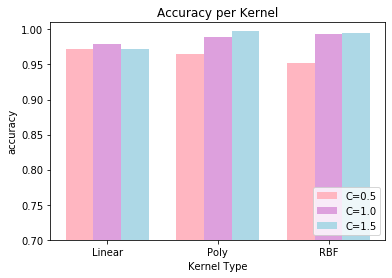

In [20]:
# bar chart for fun
x_width = np.arange(3)
plt.bar(x_width + 0.00, [scores[x][0] for x in range(0,7,3)], 
       color = 'lightpink', width = 0.25,label='C=0.5')

plt.bar(x_width + 0.25, [scores[x][0] for x in range(1,8,3)], 
       color = 'plum', width = 0.25,label='C=1.0')

plt.bar(x_width + 0.50, [scores[x][0] for x in range(2,9,3)], 
       color = 'lightblue', width = 0.25,label='C=1.5')

plt.xlabel('Kernel Type')
plt.ylabel('accuracy')
plt.ylim(0.7,1.01) 
plt.title('Accuracy per Kernel')
plt.legend( loc = 'lower right')
plt.xticks([r + 0.25 for r in range(3)], ['Linear','Poly','RBF'])


Looking at the results while the accuracies were pretty similar and better with nonlinear kernels and C>0.5, the accuracy the folds was the highest for the poly kernel with C = 1.5 - 99.8%. Therefore for the final model, I will use the rbf kernel with C=1.5. 

## Conclusion about the models

In conclusion, the motivation for my training multiple QDA, k-NN, and SVM models was to see how such different models approach a large, multiclass dataset. QDA assumes the classes to have a Gaussian distribution and positive semi-definite cov matrices, while k-NN and SVM do not. We even showed that our data does not have a positive semi-definite cov matrix by printing the covariance matrices for one of the resulting QDA models - and this was a surprise, since we even performed PCA to decorrelate the variables. Even then, the accuracy was not bad! And although SVM is typically a binary classifier, we can see that its multiclass expansion using the one-vs-rest technique actually provided better results. I had expected k-NN to perform better, solely because I had no prior knowledge about the distribution of the data (given how many samples and features there were), but after reducing dimensionality with PCA, it's easier to see how SVM and k-NN both resulted in similar accuracy. I did not expect QDA to have such high accuracy, since the reg param is usually for instances where we have a lot less samples.  


<b> Final models to train using entire dataset given the results of cross-validation: </b>

In [96]:
QDA = QDA(priors=None, reg_param=0.01, store_covariance=False)
kNN = kNN(n_neighbors=5, weights='distance', algorithm='auto', p=2)
SVC = SVC(C=1.5,kernel='poly',gamma='scale',tol=0.005,decision_function_shape='ovr')

# e - Comparative Analysis

In [98]:
# begin comparative analysis - start off with timing the training
import time
def fit_model(model, x, y):
    model.fit(x,y)
    return model
# measure time to train models
start = time.time()
QDA = fit_model(QDA,train_features,y)
end = time.time()
print('Time to fit QDA model with reduced training data:', end-start)

Time to fit QDA model with reduced training data: 1.2804296016693115


In [99]:
start = time.time()
kNN = fit_model(kNN,train_features,y)
end = time.time()
print('Time to fit kNN model with reduced training data:', end-start)

Time to fit kNN model with reduced training data: 1.9566318988800049


In [100]:
start = time.time()
SVC = fit_model(SVC,train_features,y)
end = time.time()
print('Time to fit SVM model with reduced training data:', end-start)

Time to fit SVM model with reduced training data: 65.80938720703125


Training the kNN model took significatly less time than the QDA and SVM models. SVM by far took the longest, given that it's a poly kernel; it took about 51x the time it took for QDA to fit the data. 

In [57]:
# # save QDA(), kNN(), and SVC() to pickles for future use and rerunning just in case

# import pickle
# filename = 'QDA_model.sav'
# pickle.dump(QDA, open(filename, 'wb'))
# filename = 'kNN_model.sav'
# pickle.dump(kNN, open(filename, 'wb'))
# filename = 'SVM_model.sav'
# pickle.dump(SVC, open(filename, 'wb'))


In [101]:
# now let's make some predictions! 
# measure time to make predictions
start = time.time()
y_pred_QDA = QDA.predict(test_features)
end = time.time()
print('Time to make predicions on test data with QDA model:', end-start)

Time to make predicions on test data with QDA model: 0.2789335250854492


In [102]:
start = time.time()
y_pred_kNN = kNN.predict(test_features)
end = time.time()
print('Time to make predicions on test data with kNN model:', end-start)

Time to make predicions on test data with kNN model: 13.870760202407837


In [103]:
start = time.time()
y_pred_SVC = SVC.predict(test_features)
end = time.time()
print('Time to make predicions on test data with SVC model:', end-start)

Time to make predicions on test data with SVC model: 8.82305383682251


The time it took to predict the test outputs was the slowest for k-Nearest Neighbors, even though it was the fastest to train. This is because it has to use the training data to calculate distances and then make predictions. At training time, kNN does not calculate any distances so that's why it is the fastest. K-nearest neighbors does not "learn" some function in terms of a sample <b> x </b>, but rather it remembers the training set - hence, it is known as a lazy algorithm.

In [104]:
# print out the accuracy of the predictions
print('Accuracy and misclassification error for predictions - QDA:',get_accuracy(y_test,y_pred_QDA))
print('\nAccuracy and misclassification error for predictions - kNN:',get_accuracy(y_test,y_pred_kNN))
print('\nAccuracy and misclassification error for predictions - SVM:',get_accuracy(y_test,y_pred_SVC))

Accuracy and misclassification error for predictions - QDA: (0.5551211884284597, 0.44487881157154024)

Accuracy and misclassification error for predictions - kNN: (0.7240031274433151, 0.2759968725566849)

Accuracy and misclassification error for predictions - SVM: (0.7068021892103206, 0.29319781078967944)


In [58]:
from sklearn.metrics import classification_report as class_report
print('Classification Report for QDA:\n',class_report(y_test,y_pred_QDA))
print('\nClassification Report for kNN:\n',class_report(y_test,y_pred_kNN))
print('\nClassification Report for SVC:\n',class_report(y_test,y_pred_SVC))

Classification Report for QDA:
               precision    recall  f1-score   support

         0.0       0.53      0.99      0.69       640
         1.0       1.00      0.17      0.30       448
         2.0       0.00      0.00      0.00       179
         3.0       0.00      0.00      0.00        12

    accuracy                           0.56      1279
   macro avg       0.38      0.29      0.25      1279
weighted avg       0.62      0.56      0.45      1279


Classification Report for kNN:
               precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       640
         1.0       0.67      0.68      0.67       448
         2.0       0.73      0.40      0.52       179
         3.0       0.57      0.33      0.42        12

    accuracy                           0.72      1279
   macro avg       0.68      0.57      0.60      1279
weighted avg       0.72      0.72      0.71      1279


Classification Report for SVC:
               precision    recal

C:\Users\prpar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above warning occurs for calculating F1 score for the QDA model, since it did not predict anything for classes 2 and 3.

F1-score is a useful metric, especially when the class samples are unbalanced. The closer the F1-score is to 1.0, the better the predictive ability of the model for that class. We can see that kNN has the best F1-score for class 0, with SVM trailing close behind. The F1-score tends to decrease for each class since there is a lot more testing data for class 0 (NonDemented) and only 12 for 3 (Moderate Demented).

As a reminder, F1-score is based on precision and recall - precision refers to the percentage of correctly classified as class_i divided by the total samples <i> predicted </i> classified as class_i; recall refers to the percentage of correctly classifed as class_i divided by the total samples that are <i> actually </i> classified as class_i [12].

Specifically, the recall scores were higher for class 0, meaning that the models were more accurate in correctly classifying class 0 samples. Precision was especially low for QDA class 0, since it overpredicted that label.

In [59]:
# let's make a confusion matrix non normalized 

from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import matshow

mat_qda = confusion_matrix(y_test,y_pred_QDA,labels=[0,1,2,3])
print('Raw Confusion Matrix for QDA:\n',mat_qda)

mat_knn = confusion_matrix(y_test,y_pred_kNN,labels=[0,1,2,3])
print('\nRaw Confusion Matrix for kNN:\n',mat_knn)

mat_svm = confusion_matrix(y_test,y_pred_SVC,labels=[0,1,2,3])
print('\nRaw Confusion Matrix for SVM:\n',mat_svm)

Raw Confusion Matrix for QDA:
 [[632   0   0   8]
 [367  78   0   3]
 [178   0   0   1]
 [ 12   0   0   0]]

Raw Confusion Matrix for kNN:
 [[547  78  13   2]
 [131 303  13   1]
 [ 37  70  72   0]
 [  6   2   0   4]]

Raw Confusion Matrix for SVM:
 [[568  72   0   0]
 [183 265   0   0]
 [ 62  50  67   0]
 [  4   4   0   4]]


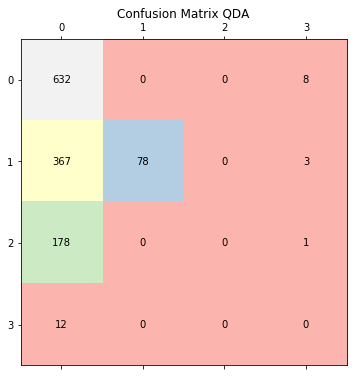

In [107]:
# make aesthetic 
# NOTE - BECAUSE I HAVE TO HARDCODE EACH PLOT I COULD NOT MAKE THEM SIDE-SIDE FOR THIS NOTEBOOK
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.set_title('Confusion Matrix QDA')
ax.matshow(mat_qda, cmap='Pastel1')
for (i, j), z in np.ndenumerate(mat_qda):
    ax.text(j, i, '{:0d}'.format(z), ha='center', va='center')

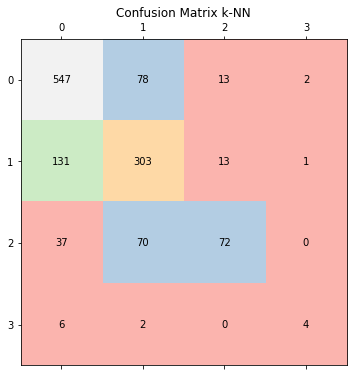

In [108]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.set_title('Confusion Matrix k-NN')
ax.matshow(mat_knn, cmap='Pastel1')
for (i, j), z in np.ndenumerate(mat_knn):
    ax.text(j, i, '{:0d}'.format(z), ha='center', va='center')

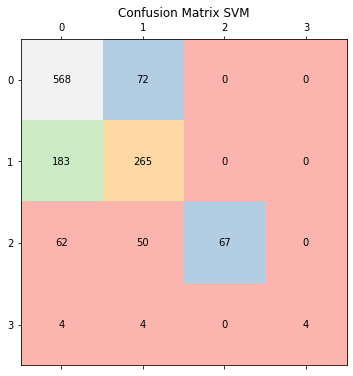

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.set_title('Confusion Matrix SVM')
ax.matshow(mat_svm, cmap='Pastel1')
for (i, j), z in np.ndenumerate(mat_svm):
    ax.text(j, i, '{:0d}'.format(z), ha='center', va='center')

([<matplotlib.axis.XTick at 0x1948d5bf860>,
 <a list of 4 Text xticklabel objects>)

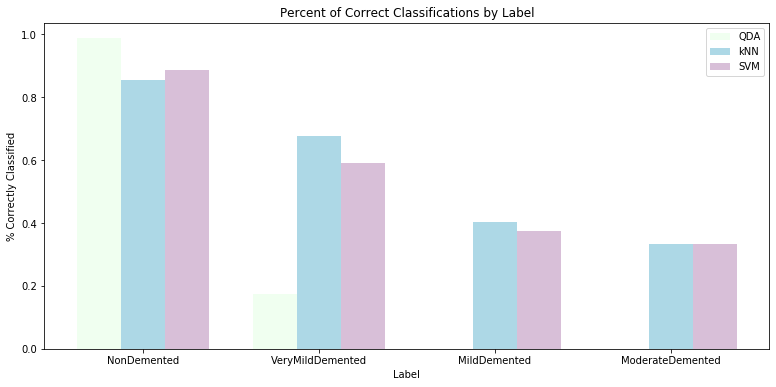

In [111]:
# bar chart for the percentage of correctly classified labels
# num of correct labels: [NonDemented, VeryMildDemented, MildDemented, ModerateDemented]
test_class_samples = np.array([640, 448, 179, 12]) # test set had Non-640, VeryMild-448, Mild-178, Moderate-12
correct_qda = [632,78,0,0]
correct_knn = [547,303,72,4] 
correct_svm = [568,265,67,4]

correct_qda_percent = [correct_qda[x]/test_class_samples[x] for x in range(4) ]
correct_knn_percent = [correct_knn[x]/test_class_samples[x] for x in range(4) ]
correct_svm_percent = [correct_svm[x]/test_class_samples[x] for x in range(4) ]


fig, ax = plt.subplots(figsize=(13,6))
x_width = np.arange(4)
plt.bar(x_width + 0.00, correct_qda_percent, 
       color = 'honeydew', width = 0.25,label='QDA')
plt.bar(x_width + 0.25, correct_knn_percent, 
       color = 'lightblue', width = 0.25,label='kNN')
plt.bar(x_width + 0.50, correct_svm_percent, 
       color = 'thistle', width = 0.25,label='SVM')

plt.xlabel('Label')
plt.ylabel('% Correctly Classified')
plt.title('Percent of Correct Classifications by Label')
plt.legend()
plt.xticks([r + 0.25 for r in range(4)], ['NonDemented','VeryMildDemented','MildDemented','ModerateDemented'])


([<matplotlib.axis.XTick at 0x1948d642320>,
 <a list of 4 Text xticklabel objects>)

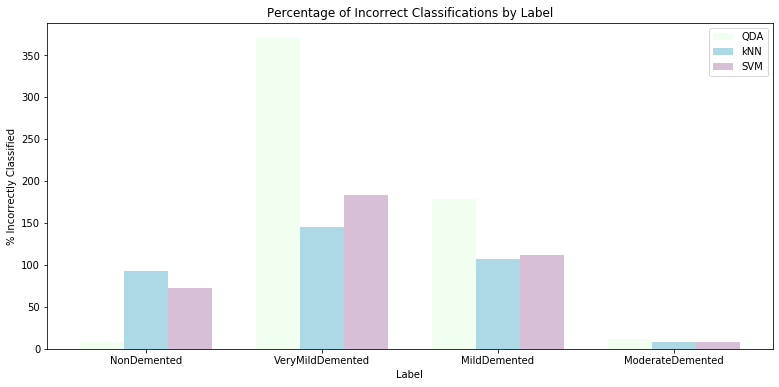

In [112]:
# bar chart for the number of incorrectly classified labels (total samples per class - correctly identified)
# num of correct labels: [NonDemented, VeryMildDemented, MildDementer, ModerateDementer]

incorrect_qda = np.subtract(test_class_samples, np.array(correct_qda))
incorrect_knn = np.subtract(test_class_samples, np.array(correct_knn))
incorrect_svm = np.subtract(test_class_samples, np.array(correct_svm))

incorrect_qda_percent = [incorrect_qda[x]/test_class_samples[x] for x in range(4) ]
incorrect_knn_percent = [incorrect_knn[x]/test_class_samples[x] for x in range(4) ]
incorrect_svm_percent = [incorrect_svm[x]/test_class_samples[x] for x in range(4) ]

fig, ax = plt.subplots(figsize=(13,6))
x_width = np.arange(4)
plt.bar(x_width + 0.00, incorrect_qda, 
       color = 'honeydew', width = 0.25,label='QDA')
plt.bar(x_width + 0.25, incorrect_knn, 
       color = 'lightblue', width = 0.25,label='kNN')
plt.bar(x_width + 0.50, incorrect_svm, 
       color = 'thistle', width = 0.25,label='SVM')

plt.xlabel('Label')
plt.ylabel('% Incorrectly Classified')
plt.title('Percentage of Incorrect Classifications by Label')
plt.legend()
plt.xticks([r + 0.25 for r in range(4)], ['NonDemented','VeryMildDemented','MildDemented','ModerateDemented'])


In [113]:
print(correct_qda_percent)
print(incorrect_qda_percent)

[0.9875, 0.17410714285714285, 0.0, 0.0]
[0.0125, 0.8258928571428571, 1.0, 1.0]


In [114]:
print(correct_knn_percent)
print(incorrect_knn_percent)

[0.8546875, 0.6763392857142857, 0.4022346368715084, 0.3333333333333333]
[0.1453125, 0.3236607142857143, 0.5977653631284916, 0.6666666666666666]


In [115]:
print(correct_svm_percent)
print(incorrect_svm_percent)

[0.8875, 0.5915178571428571, 0.3743016759776536, 0.3333333333333333]
[0.1125, 0.40848214285714285, 0.6256983240223464, 0.6666666666666666]


The total accuracy for the test images were

- QDA: 55.5%
- kNN: 72.4%
- SVM: 70.7%

After looking at the results of the confusion matrices (predicted class as cols, true class as rows), we can see that QDA was best for predicting the NonDemented images as opposed to any other one. However, QDA unfortunately did not predict any MildDemented and ModerateDemented samples correctly - it predicted all of them to be NonDemented. The reason can be because QDA ran into issues with collinearty and suffered in accuracy.

SVM and k-NN classifiers were a bit more accurate with kNN beating SVM in number of correct classifications for all but NonDemented (as seen in the graphs). 

Both training and testing sets had far fewer samples for Mild and ModerateDemented, so the results aren't too suprising. 

Given the nature of the problem/task, it is better to be safer than sorry. Therefore I'd prefer to predict that an MRI corresponds to having some Demented as opposed to not (more false positives than false negatives). For that reason I would choose my final model to be the one learned by the <b> k-Nearest Neigbors </b> algorithm (with k=5).

# f - Discussion

The ethical aspects of the tasks I carried out in this dataset can have important impacts in the healthcare industry. As of right now, it is difficult to detect Alzheimer's disease in its early stages - MRIs may look normal. Treatment for the disease may come too late after enough damage has already been done to an affected person's brain/cognitive abilities. Therefore it is important to be able to predict Alzheimer's as soon as possible to take steps to mitigate its effects. Using a machine learning algorithm (that is more accurate than mine) to predict the severity of dementia can be used to predict the stage of Alzheimer's (if any) possibly earlier than ever before. While there is no cure or way to prevent it from progressing, just having the knowledge of the disease can make it easier to deal with in the long run. 

# g - Bibliography

<b> Dataset </b>

[1] S. Dubey, “Alzheimer's Dataset ( 4 class of Images),” Kaggle, 26-Dec-2019. [Online]. Available: https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images. [Accessed: 12-Dec-2020].

<b> Image Processing </b>

[2] A. Clark, “Image Module,” Image Module - Pillow (PIL Fork) 8.0.1 documentation. [Online]. Available: https://pillow.readthedocs.io/en/stable/reference/Image.html. [Accessed: 12-Dec-2020].

<b> Standard Scaler </b>

[3] “sklearn.preprocessing.StandardScaler,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html. [Accessed: 12-Dec-2020].

<b> PCA </b>

[4] S. Norena, “PCA (Principal Components Analysis) applied to images of faces,” Medium, 15-Jun-2018. [Online]. 
Available: https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371. [Accessed: 12-Dec-2020].

<b> QDA </b>

[5] “sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html. [Accessed: 12-Dec-2020].

<b> Stratified K Fold and Validation </b>

[6] “sklearn.model_selection.StratifiedKFold,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html. [Accessed: 12-Dec-2020].

<b> K-Nearest Neighbors </b>

[7] “sklearn.neighbors.KNeighborsClassifier,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. [Accessed: 12-Dec-2020].

<b> Support Vector Machine </b>

[8] “sklearn.svm.SVC,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. [Accessed: 12-Dec-2020]. 



[9] “RBF SVM parameters,” scikit. [Online]. Available: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html. [Accessed: 12-Dec-2020]. 

<b> Plot Formatting </b>

[10] "Show the values in the grid using matplotlib,” Stackoverflow.com. [Online]. Available: https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib. [Accessed: 12-Dec-2020].


[11] “Choosing Colormaps in Matplotlib — Matplotlib 3.3.3 documentation,” Matplotlib.org. [Online]. Available: https://matplotlib.org/tutorials/colors/colormaps.html. [Accessed: 12-Dec-2020]. 

[12] “List of named colors — Matplotlib 3.1.0 documentation,” Matplotlib.org. [Online]. Available: https://matplotlib.org/3.1.0/gallery/color/named_colors.html. [Accessed: 12-Dec-2020].

 



<b> F1 Metric </b>

[12] 	K. P. Shung, “Accuracy, precision, recall or F1? - towards data science,” Towards Data Science, 15-Mar-2018. [Online]. Available: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. [Accessed: 12-Dec-2020].




